In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression
import pandas as pd

# Historical daily data from 2020 to 2024

In [2]:
#stocks = ["MSFT","NVDA","AMD","SSL","AAPL","GOOG","AMZN","ASML","LL6A.SG","PFE","AVGO", "DELL","INTC"]
#stocks = ["NPN.JO", "AGL.JO", "SOL.JO", "SBK.JO", "MTN.JO", "SHP.JO", "WHL.JO", "TFG.JO", "FSR.JO", "AIP.JO", "CPI.JO", "APN.JO", "DSY.JO"]
stocks = ["NPN.JO", "AGL.JO", "SOL.JO", "SBK.JO", "MTN.JO", "SHP.JO", "WHL.JO", "TFG.JO", "FSR.JO", "AIP.JO", "CPI.JO", "APN.JO", "DSY.JO", "DRD.JO", "SUI.JO", "HAR.JO", "ANG.JO"]
data = yf.download(stocks, start="2020-06-01", end="2024-09-01", interval="1d")

[*********************100%***********************]  17 of 17 completed


In [3]:
df = data['Adj Close']
df.head()

Ticker,AGL.JO,AIP.JO,ANG.JO,APN.JO,CPI.JO,DRD.JO,DSY.JO,FSR.JO,HAR.JO,MTN.JO,NPN.JO,SBK.JO,SHP.JO,SOL.JO,SUI.JO,TFG.JO,WHL.JO
Date,,,,,,,,,,,,,,,,,
2020-06-01 00:00:00+00:00,31317.789062,3860.157471,40067.500000,13083.041016,80938.125000,1351.731689,9677.099609,3362.731201,5546.246094,4976.784180,282195.75000,7462.815430,9087.130859,8893.075195,696.774231,5022.328613,2508.377197
2020-06-02 00:00:00+00:00,32082.837891,4048.457764,41584.605469,13413.952148,83966.718750,1380.423828,9830.938477,3456.163818,5546.246094,5199.818359,288631.81250,7830.929688,9536.474609,10345.905273,1077.212769,5414.624023,2741.329102
2020-06-03 00:00:00+00:00,32635.146484,4022.399658,39032.890625,13782.042969,88730.679688,1259.278320,10713.543945,3754.813477,4928.833496,5327.924316,290602.25000,8803.029297,10261.054688,10984.269531,1086.967773,6045.775879,3017.905029
2020-06-04 00:00:00+00:00,32246.232422,4139.245605,39212.539062,13524.563477,89772.093750,1264.857422,10677.055664,3653.873047,5066.775879,5282.764648,284671.15625,8717.187500,10235.553711,11310.055664,1059.096924,5947.702637,3036.226807
2020-06-05 00:00:00+00:00,33741.449219,4298.124023,36340.089844,13967.948242,98201.945312,1197.111328,10948.248047,3856.588135,4807.063477,5363.867676,289443.71875,9259.305664,10060.564453,13207.538086,1015.896790,6230.060059,3064.145996


In [4]:
df.columns
column_names = ['Anglo American','Adcock','AngloGold Ashanti', 'Aspen','Capitec','DRDGold','Discovery', 'FirstRand','Harmony', 'MTN', 'Naspers', 'Standard Bank', 'Shoprite', 'Sasol','Sun International' ,'Foschini', 'Woolworths']

In [5]:
df.columns = column_names
df.head()

,Anglo American,Adcock,AngloGold Ashanti,Aspen,Capitec,DRDGold,Discovery,FirstRand,Harmony,MTN,Naspers,Standard Bank,Shoprite,Sasol,Sun International,Foschini,Woolworths
Date,,,,,,,,,,,,,,,,,
2020-06-01 00:00:00+00:00,31317.789062,3860.157471,40067.500000,13083.041016,80938.125000,1351.731689,9677.099609,3362.731201,5546.246094,4976.784180,282195.75000,7462.815430,9087.130859,8893.075195,696.774231,5022.328613,2508.377197
2020-06-02 00:00:00+00:00,32082.837891,4048.457764,41584.605469,13413.952148,83966.718750,1380.423828,9830.938477,3456.163818,5546.246094,5199.818359,288631.81250,7830.929688,9536.474609,10345.905273,1077.212769,5414.624023,2741.329102
2020-06-03 00:00:00+00:00,32635.146484,4022.399658,39032.890625,13782.042969,88730.679688,1259.278320,10713.543945,3754.813477,4928.833496,5327.924316,290602.25000,8803.029297,10261.054688,10984.269531,1086.967773,6045.775879,3017.905029
2020-06-04 00:00:00+00:00,32246.232422,4139.245605,39212.539062,13524.563477,89772.093750,1264.857422,10677.055664,3653.873047,5066.775879,5282.764648,284671.15625,8717.187500,10235.553711,11310.055664,1059.096924,5947.702637,3036.226807
2020-06-05 00:00:00+00:00,33741.449219,4298.124023,36340.089844,13967.948242,98201.945312,1197.111328,10948.248047,3856.588135,4807.063477,5363.867676,289443.71875,9259.305664,10060.564453,13207.538086,1015.896790,6230.060059,3064.145996


# Adjusted pricing of subset of 6 stocks and Estimated Total returns

In [6]:
df_plot = df[['Aspen','Capitec','DRDGold','MTN','Sun International' , 'Woolworths']]
df_plot.head()

,Aspen,Capitec,DRDGold,MTN,Sun International,Woolworths
Date,,,,,,
2020-06-01 00:00:00+00:00,13083.041016,80938.125000,1351.731689,4976.784180,696.774231,2508.377197
2020-06-02 00:00:00+00:00,13413.952148,83966.718750,1380.423828,5199.818359,1077.212769,2741.329102
2020-06-03 00:00:00+00:00,13782.042969,88730.679688,1259.278320,5327.924316,1086.967773,3017.905029
2020-06-04 00:00:00+00:00,13524.563477,89772.093750,1264.857422,5282.764648,1059.096924,3036.226807
2020-06-05 00:00:00+00:00,13967.948242,98201.945312,1197.111328,5363.867676,1015.896790,3064.145996


In [7]:
# Total daily returns = daily price of stock

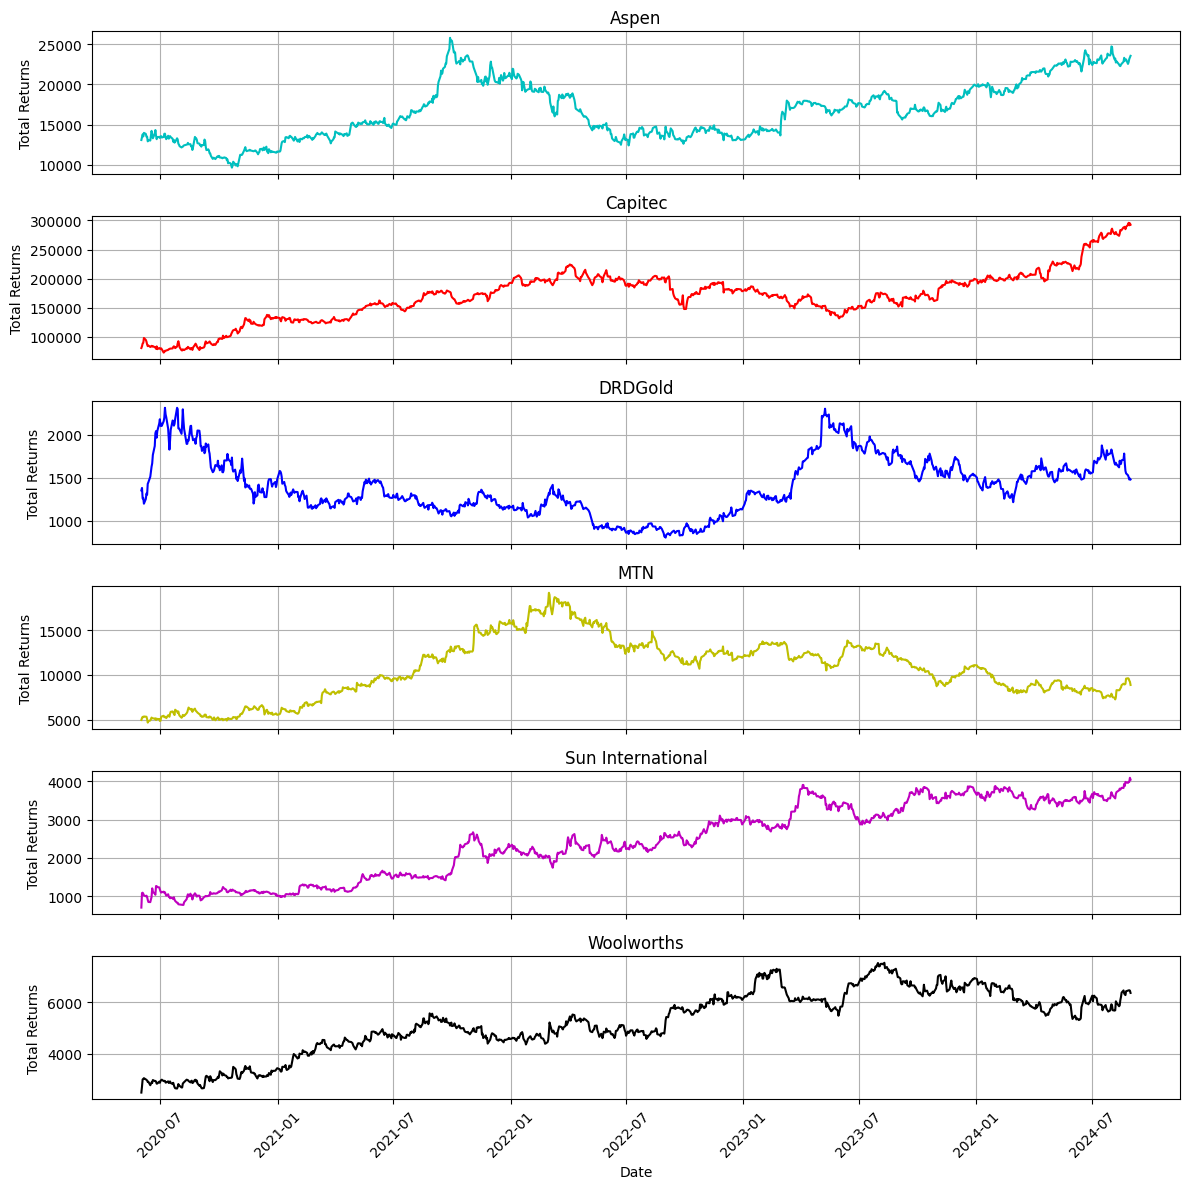

In [8]:
#Create a 5x1 grid of subplots
fig, axs = plt.subplots(6, 1, figsize=(12, 12), sharex=True)

#Define the colors for each stock
colors = ['c', 'r', 'b', 'y', 'm','black']

#Plot each stock's total returns in a separate subplot
stocks = df_plot.columns
for i, stock in enumerate(stocks):
    axs[i].plot(df_plot.index, df_plot[stock], label=stock, color=colors[i])
    axs[i].set_title(stock)
    axs[i].set_ylabel('Total Returns')
    axs[i].grid(True)  # Add grid lines
    axs[i].tick_params(axis='x', rotation=45)

#Adjust layout and show the plot
axs[-1].set_xlabel('Date')
plt.tight_layout()
plt.show()

In [9]:
# total returns = price_t/price_t-1
# R = X1/X0 - investment at t=0 and payouyt received at t=1
#total_returns = df_portfolio[['Apple', 'Pfizer', 'Nvidia','Sasol','MTN']] / df_portfolio[['Apple', 'Pfizer', 'Nvidia','Sasol','MTN']].shift(1)
df_portfolio = df[['Aspen','Capitec','DRDGold','MTN','Sun International' , 'Woolworths']]
Asset_names = ['Aspen','Capitec','DRDGold','MTN','Sun International' , 'Woolworths']
df_portfolio.head()

,Aspen,Capitec,DRDGold,MTN,Sun International,Woolworths
Date,,,,,,
2020-06-01 00:00:00+00:00,13083.041016,80938.125000,1351.731689,4976.784180,696.774231,2508.377197
2020-06-02 00:00:00+00:00,13413.952148,83966.718750,1380.423828,5199.818359,1077.212769,2741.329102
2020-06-03 00:00:00+00:00,13782.042969,88730.679688,1259.278320,5327.924316,1086.967773,3017.905029
2020-06-04 00:00:00+00:00,13524.563477,89772.093750,1264.857422,5282.764648,1059.096924,3036.226807
2020-06-05 00:00:00+00:00,13967.948242,98201.945312,1197.111328,5363.867676,1015.896790,3064.145996


In [10]:
# pct_change calculates percentage change between consecutive rows (X1-X0/X0)
rate_of_return = df_portfolio.pct_change(fill_method=None)
rate_of_return.head()

,Aspen,Capitec,DRDGold,MTN,Sun International,Woolworths
Date,,,,,,
2020-06-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-02 00:00:00+00:00,0.025293,0.037419,0.021226,0.044815,0.546000,0.092870
2020-06-03 00:00:00+00:00,0.027441,0.056736,-0.087760,0.024637,0.009056,0.100891
2020-06-04 00:00:00+00:00,-0.018682,0.011737,0.004430,-0.008476,-0.025641,0.006071
2020-06-05 00:00:00+00:00,0.032784,0.093903,-0.053560,0.015352,-0.040790,0.009195


In [11]:
rate_of_return.info()
rate_of_return =rate_of_return.dropna()
rate_of_return.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1064 entries, 2020-06-01 00:00:00+00:00 to 2024-08-30 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Aspen              1063 non-null   float64
 1   Capitec            1063 non-null   float64
 2   DRDGold            1063 non-null   float64
 3   MTN                1063 non-null   float64
 4   Sun International  1063 non-null   float64
 5   Woolworths         1063 non-null   float64
dtypes: float64(6)
memory usage: 58.2 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1063 entries, 2020-06-02 00:00:00+00:00 to 2024-08-30 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Aspen              1063 non-null   float64
 1   Capitec            1063 non-null   float64
 2   DRDGold            1063 non-null   float64
 3   MTN                106

# Portfolio Optimisation Components

In [12]:
expected_return = rate_of_return.mean()*252 # annualised expected return

In [13]:
expected_return

,0
Aspen,0.194308
Capitec,0.354404
DRDGold,0.132168
MTN,0.213708
Sun International,0.544838
Woolworths,0.267403


In [14]:
np.round(expected_return*100,2)

,0
Aspen,19.43
Capitec,35.44
DRDGold,13.22
MTN,21.37
Sun International,54.48
Woolworths,26.74


In [15]:
# Annualized Covariance Matrix=Daily Covariance Matrix×252
covarriance_matrix = rate_of_return.cov()*252

In [16]:
covarriance_matrix

,Aspen,Capitec,DRDGold,MTN,Sun International,Woolworths
Aspen,0.110989,0.028243,0.003345,0.034412,0.023867,0.023865
Capitec,0.028243,0.099512,-0.011307,0.038674,0.020733,0.036897
DRDGold,0.003345,-0.011307,0.222087,0.004174,-0.002777,0.002672
MTN,0.034412,0.038674,0.004174,0.153847,0.030450,0.036792
Sun International,0.023867,0.020733,-0.002777,0.030450,0.277645,0.035533
Woolworths,0.023865,0.036897,0.002672,0.036792,0.035533,0.095003


In [17]:
np.round(covarriance_matrix,4)

,Aspen,Capitec,DRDGold,MTN,Sun International,Woolworths
Aspen,0.1110,0.0282,0.0033,0.0344,0.0239,0.0239
Capitec,0.0282,0.0995,-0.0113,0.0387,0.0207,0.0369
DRDGold,0.0033,-0.0113,0.2221,0.0042,-0.0028,0.0027
MTN,0.0344,0.0387,0.0042,0.1538,0.0305,0.0368
Sun International,0.0239,0.0207,-0.0028,0.0305,0.2776,0.0355
Woolworths,0.0239,0.0369,0.0027,0.0368,0.0355,0.0950


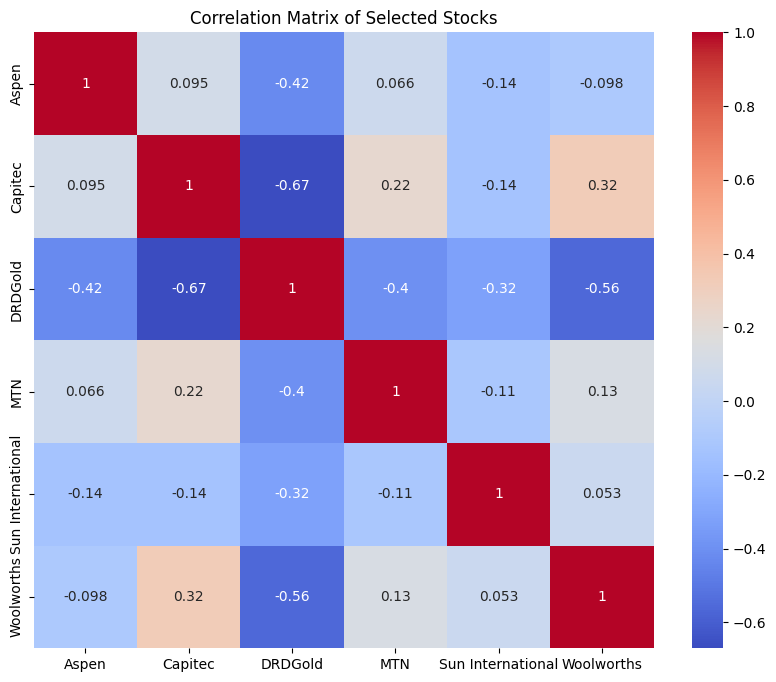

In [18]:
import seaborn as sns

# Check the correlation matrix between the selected stocks
corr_matrix = covarriance_matrix.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Selected Stocks')
plt.show()

In [19]:
# Number of assets and weights initialisation
num_assets = len(expected_return)
weights = np.random.dirichlet(np.ones(num_assets), size=1)[0] # generate weights using Dirichlet distribution
#weights = np.array([1/num_assets] * num_assets)
weights= np.round(weights,4)
num_assets, weights

(6, array([0.017 , 0.2865, 0.0187, 0.0412, 0.475 , 0.1616]))

## Portfolio varriance/risk inputs:
1.   covarriance matrix
2.   portfolio weights
**portfolio_variance**  = weights * covarriance_matrix * weights_T  -- want to minimise

## Sharpe ratio inputs:
portfolio_expected_returns = product_sum(weights,expected_return)  -- want to maximise
portfolio_standard_deviation = root(portfolio_variance) -- want minimised with portfolio risk

**Sharpe_ratio  = portfolio_expected_returns/portfolio_standard_deviation**

# Objective Function:

## minimise portfolio risk :
portfolio_variance = weights * covarriance_matrix * weights_T *

## Subject to


*   Expected_return*weights >= R (can be minimum portfolio return or median return)
*   sum_weights = 1 -- allocate all funds
*   wieghts >= 0  -- optional, means no short selling


In [20]:
# Define objective function = portfolio variance (risk)
def portfolio_variance(weights, covarriance_matrix):
    cov_matrix = covarriance_matrix #* 100  # Scale the covariance matrix if necessary
    portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
    return portfolio_variance

# Define the expected portfolio return
def portfolio_return(weights, expected_return):
    portfolio_return = np.dot(weights, expected_return)
    return portfolio_return

# Median return constraint: portfolio return >= median return (R)
def return_constraint(weights, expected_return, R):
    return portfolio_return(weights, expected_return) - R

def sharpe_ratio(weights, expected_return, covarriance_matrix):
    risk_free_rate=0.0792
    portfolio_ret = portfolio_return(weights, expected_return)
    portfolio_std_dev = np.sqrt(portfolio_variance(weights, covarriance_matrix))
    return (portfolio_ret - risk_free_rate) / portfolio_std_dev

# Give constarint R - want it to be better than the median E(r) or minium E(r)
R = np.min(expected_return)
#R = np.median(expected_return)

# Define obj func constraints:
constraints = [
    {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},  # Weights sum to 1
    {'type': 'ineq', 'fun': return_constraint, 'args': (expected_return, R)}  # Return constraint
]

# Define bounds: weights not bounded (with short-selling)
bounds = None
#bounds = tuple((0, 1) for asset in range(num_assets)) # weights between 0 and 1 (long-only portfolio / no short-selling)

In [21]:
# Minimize the portfolio variance subject to the new constraint
result = minimize(portfolio_variance, weights, args=(covarriance_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)

# Get optimized weights
optimal_weights = result.x

# Get optimized varriance
portfolio_varriance = result.fun

# Output results
print("Optimised portfolio weights:", np.round(optimal_weights,3))
print("Optimised portfolio varriance:", np.round(portfolio_varriance,3))
# Calculate the expected portfolio returns with optimised weights

optimised_portfolio_returns = portfolio_return(optimal_weights, expected_return)
print("Optimised portfolio returns:", np.round(optimised_portfolio_returns*100,3),'%')

Optimised portfolio weights: [0.207 0.238 0.187 0.084 0.074 0.21 ]
Optimised portfolio varriance: 0.04
Optimised portfolio returns: 26.391 %


In [22]:
# DataFrame for the results
results_df = pd.DataFrame({
    'Stock': ['Aspen','Capitec','DRDGold','MTN','Sun International' , 'Woolworths'],
    'Optimized Weights': np.round(optimal_weights, 3),
})

variance_df = pd.DataFrame({'Stock': ['Optimized Portfolio Variance'], 'Optimized Weights': [np.round(portfolio_varriance, 3)]})

returns_df = pd.DataFrame({'Stock': ['Optimized Portfolio Returns (%)'], 'Optimized Weights': [np.round(optimised_portfolio_returns * 100, 3)]})

# Concatenate all DataFrames
results_df = pd.concat([results_df, variance_df, returns_df], ignore_index=True)

# Print the results as a table
print(results_df)

                             Stock  Optimized Weights
0                            Aspen              0.207
1                          Capitec              0.238
2                          DRDGold              0.187
3                              MTN              0.084
4                Sun International              0.074
5                       Woolworths              0.210
6     Optimized Portfolio Variance              0.040
7  Optimized Portfolio Returns (%)             26.391


In [23]:
optimised_portfolio_returns

0.2639126725287463

# Efficient Front Plot

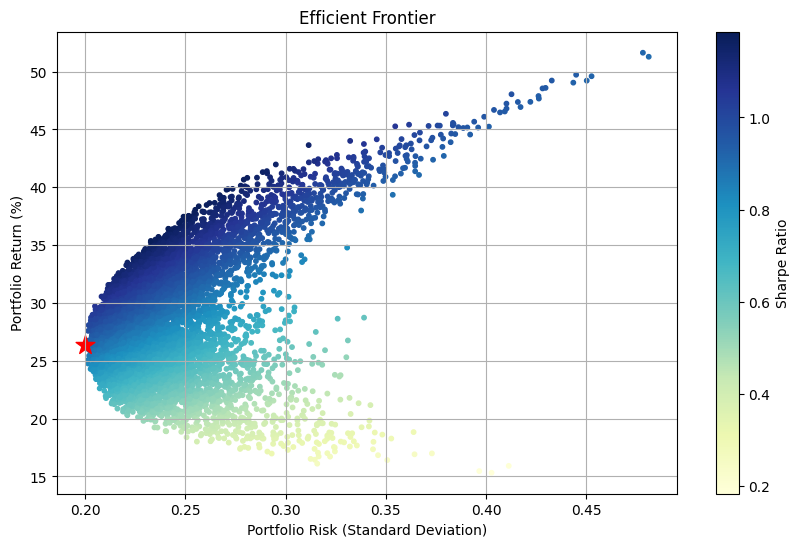

In [24]:
# Define the number of portfolios to simulate
num_portfolios = 8000
weights_record = np.zeros((num_portfolios, num_assets))

# Initialize arrays to hold results
results = np.zeros((3, num_portfolios))  # [Portfolio Return, Portfolio Variance, Portfolio Std Dev]

# Generate random portfolios
for i in range(num_portfolios):
    # Randomly assign weights
    weights_ef = np.random.dirichlet(np.ones(num_assets), size=1)[0]
    weights_record[i] = weights_ef  # Store weights for reference

    # Calculate portfolio return and variance
    port_return = portfolio_return(weights_ef, expected_return)
    port_variance = portfolio_variance(weights_ef, covarriance_matrix)
    port_std_dev = np.sqrt(port_variance)
    sharpe_ratio_result = sharpe_ratio(weights_ef, expected_return, covarriance_matrix)

    # Store results
    results[0, i] = port_return
    results[1, i] = sharpe_ratio_result
    results[2, i] = port_std_dev

# Plot the Efficient Frontier
plt.figure(figsize=(10, 6))
plt.scatter(results[2, :], results[0, :]*100, c=results[1, :], marker='o', cmap='YlGnBu',s = 10)
plt.colorbar(label='Sharpe Ratio')
plt.title('Efficient Frontier')
plt.xlabel('Portfolio Risk (Standard Deviation)')
plt.ylabel('Portfolio Return (%)')

# Highlight the best portfolio based on Sharpe ratio
plt.scatter(np.sqrt(result.fun), optimised_portfolio_returns*100, color='red', marker='*', s=200, label='Optimal Portfolio')

# Display the plot
plt.grid()
plt.show()

In [25]:
results_table = pd.DataFrame(results.T, columns=['Returns','Sharpe', 'Variance'])
weights_table = pd.DataFrame(weights_record, columns = ['Aspen','Capitec','DRDGold','MTN','Sun International' , 'Woolworths'])

combined_results = pd.concat([results_table, weights_table], axis=1)

combined_results.head()

,Returns,Sharpe,Variance,Aspen,Capitec,DRDGold,MTN,Sun International,Woolworths
0,0.270853,0.882117,0.217265,0.269504,0.011535,0.166734,0.106503,0.181711,0.264013
1,0.281559,0.893608,0.226451,0.185457,0.381806,0.015615,0.175678,0.021767,0.219677
2,0.318689,1.056922,0.226591,0.105523,0.166776,0.202567,0.010108,0.261059,0.253967
3,0.284761,0.910880,0.225672,0.070728,0.394107,0.098665,0.283158,0.060508,0.092835
4,0.388004,1.045927,0.295245,0.146446,0.143457,0.068469,0.096262,0.480304,0.065063


In [26]:
# Sort by the 'Return (%)' column
combined_results = combined_results.sort_values(by='Sharpe',  ascending=False)
combined_results.head()

,Returns,Sharpe,Variance,Aspen,Capitec,DRDGold,MTN,Sun International,Woolworths
3737,0.383620,1.185936,0.256692,0.018023,0.470059,0.038818,0.035610,0.302056,0.135434
1987,0.374629,1.185924,0.249113,0.029537,0.528087,0.084629,0.023238,0.274419,0.060090
591,0.380573,1.181959,0.254977,0.045703,0.544726,0.071145,0.027073,0.289055,0.022298
3298,0.364182,1.179860,0.241539,0.049532,0.388917,0.082784,0.049058,0.289774,0.139935
2040,0.353652,1.178944,0.232795,0.093271,0.414423,0.111221,0.004419,0.260566,0.116100


In [27]:
# Finding efficient portfolios with highest Sharpe Ratio
#def find_efficient_portfolios(results, weights_record, num_top=5):
#    sharpe_ratios = results[1, i]  # Calculate Sharpe Ratios
#    top_indices = np.argsort(sharpe_ratios)[-num_top:]  # Get indices of top portfolios
#    return weights_record[top_indices], results[:, top_indices]  # Return weights and results

# Fidning top efficient portfolios based on Sharpe Ratio
num_top = 5
#top_weights, top_results = find_efficient_portfolios(results, weights_record, num_top=num_top)
#returns = np.round(top_results[0, :],3)
#variances = np.round(top_results[2, :],3)

Top_results = combined_results.head(5)

In [28]:
Top_results

,Returns,Sharpe,Variance,Aspen,Capitec,DRDGold,MTN,Sun International,Woolworths
3737,0.383620,1.185936,0.256692,0.018023,0.470059,0.038818,0.035610,0.302056,0.135434
1987,0.374629,1.185924,0.249113,0.029537,0.528087,0.084629,0.023238,0.274419,0.060090
591,0.380573,1.181959,0.254977,0.045703,0.544726,0.071145,0.027073,0.289055,0.022298
3298,0.364182,1.179860,0.241539,0.049532,0.388917,0.082784,0.049058,0.289774,0.139935
2040,0.353652,1.178944,0.232795,0.093271,0.414423,0.111221,0.004419,0.260566,0.116100


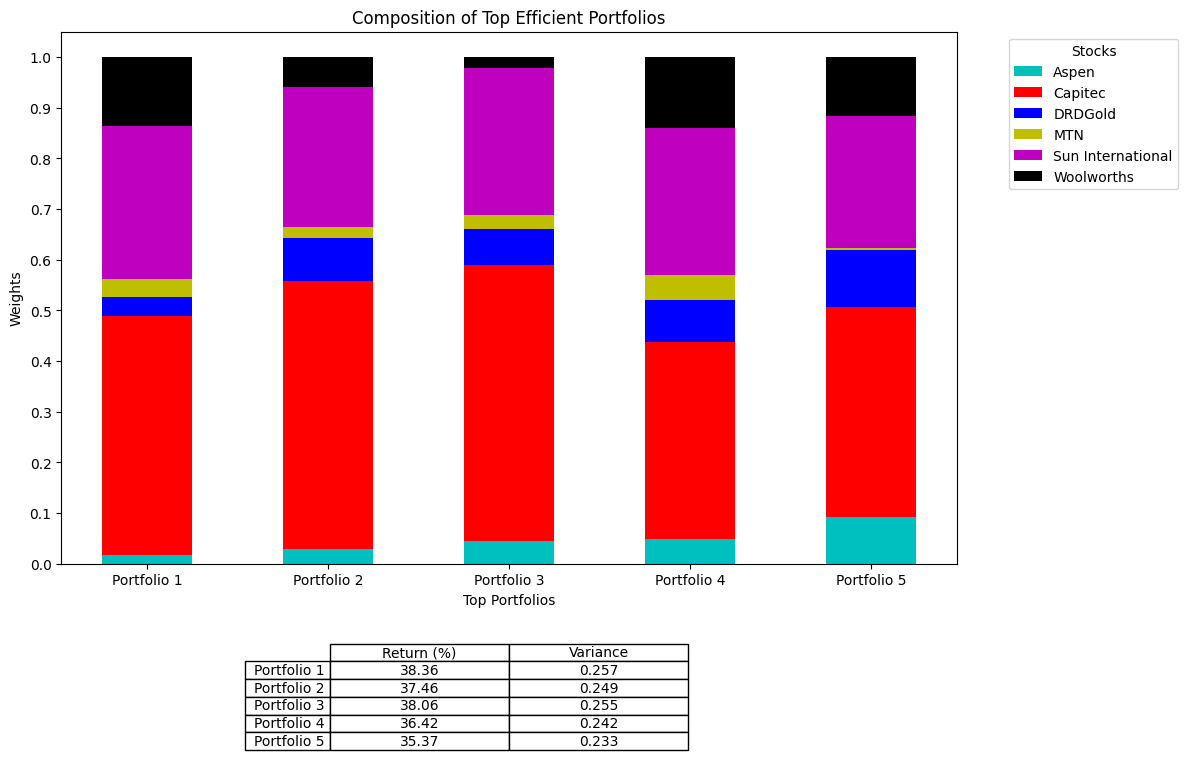

In [29]:
# Extract relevant data
returns = Top_results['Returns'].values*100
variances = Top_results['Variance'].values
top_weights = Top_results[['Aspen', 'Capitec', 'DRDGold', 'MTN', 'Sun International', 'Woolworths']].values
Asset_names = ['Aspen', 'Capitec', 'DRDGold', 'MTN', 'Sun International', 'Woolworths']

# Plotting portfolio composition graph
plt.figure(figsize=(12, 8))

num_top = top_weights.shape[0]  # Number of portfolios
bar_width = 0.5
indices = np.arange(num_top)
bottoms = np.zeros(num_top)

# Color palette
#colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
colors = ['c', 'r', 'b', 'y', 'm','black']


# Stack the weights for each portfolio
for i in range(top_weights.shape[1]):
    plt.bar(indices, top_weights[:, i], bar_width, bottom=bottoms, color=colors[i % len(colors)], label=Asset_names[i])
    bottoms += top_weights[:, i]

# X-axis and Y-axis labels
plt.xticks(indices, [f'Portfolio {i+1}' for i in range(num_top)])
plt.xlabel('Top Portfolios')
plt.ylabel('Weights')
plt.yticks(np.arange(0, 1.05, 0.1))  # Adjust range for better visibility
plt.title('Composition of Top Efficient Portfolios')

# Add a table with returns and variances
table_data = np.array([np.round(returns, 2), np.round(variances, 3)]).T
table = plt.table(cellText=table_data, colLabels=['Return (%)', 'Variance'],
                  rowLabels=[f'Portfolio {i+1}' for i in range(num_top)],
                  cellLoc='center', loc='bottom', bbox=[0.3, -0.35, 0.4, 0.2])

# Move the legend to the right side of the plot
plt.legend(title='Stocks', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


# Compute for larger portolfio combination

Adcock               0.156997
Aspen                0.194308
Capitec              0.354404
DRDGold              0.132168
Discovery            0.151194
Harmony              0.420961
MTN                  0.213708
Sasol                0.236066
Sun International    0.544838
Foschini             0.317748
Woolworths           0.267403
dtype: float64


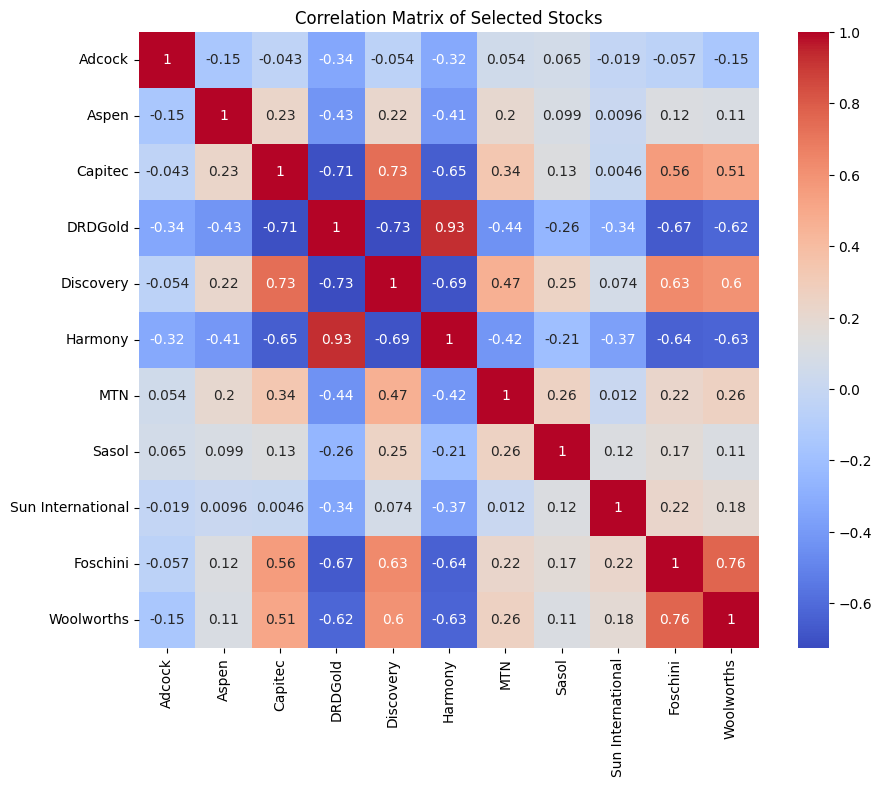

Optimised portfolio weights: [0.267 0.14  0.132 0.101 0.093 0.046 0.019 0.    0.049 0.031 0.121]
Optimised portfolio varriance: 0.031
Optimised portfolio returns: 23.607 %


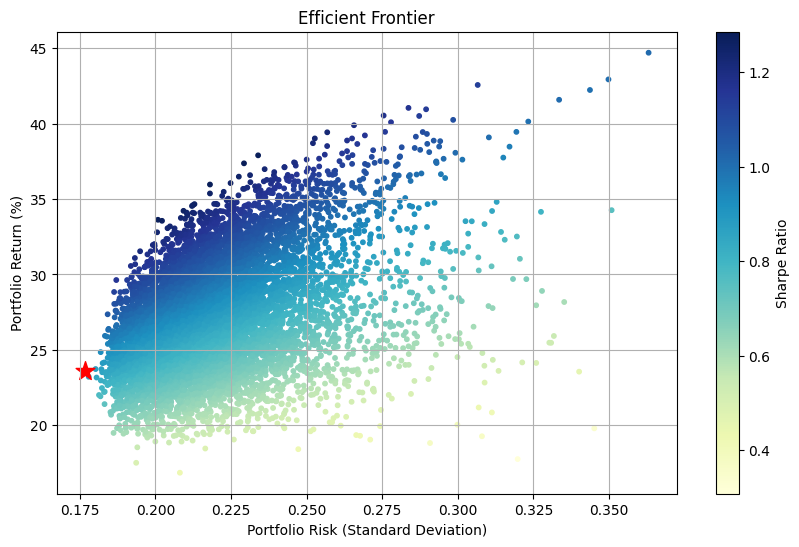

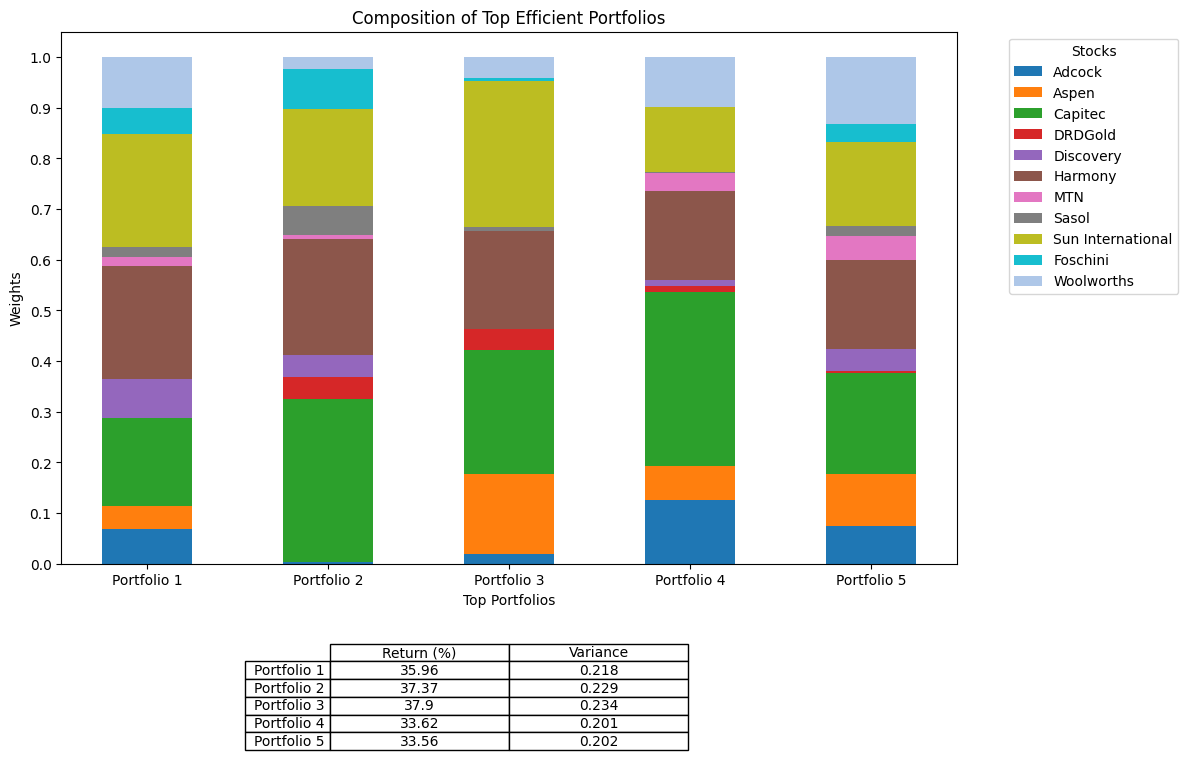

In [30]:
df_portfolio2 = df[['Adcock', 'Aspen','Capitec','DRDGold','Discovery', 'Harmony', 'MTN', 'Sasol','Sun International' ,'Foschini', 'Woolworths']]
Asset_names = ['Adcock', 'Aspen','Capitec','DRDGold','Discovery', 'Harmony', 'MTN', 'Sasol','Sun International' ,'Foschini', 'Woolworths']
rate_of_return = df_portfolio2.pct_change(fill_method=None)
rate_of_return =rate_of_return.dropna()
expected_return = rate_of_return.mean()*252 # annualised expected return
print(expected_return)
covarriance_matrix = rate_of_return.cov()*252

import seaborn as sns

# Check the correlation matrix between the selected stocks
corr_matrix = covarriance_matrix.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Selected Stocks')
plt.show()

# Number of assets and weights initialisation
num_assets = len(expected_return)
weights = np.random.dirichlet(np.ones(num_assets), size=1)[0] # generate weights using Dirichlet distribution
weights= np.round(weights,4)

# Give constarint R - want it to be better than the median E(r) or minium E(r)
R = np.median(expected_return)
#R = np.max(expected_return)
#R = np.median(expected_return)

# Define obj func constraints:
constraints = [
    {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},  # Weights sum to 1
    {'type': 'ineq', 'fun': return_constraint, 'args': (expected_return, R)}  # Return constraint
]

# Define bounds: weights not bounded (with short-selling)
bounds = None

# Minimize the portfolio variance subject to the new constraint
result2 = minimize(portfolio_variance, weights, args=(covarriance_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)

# Get optimized weights
optimal_weights = result2.x

# Get optimized varriance
portfolio_varriance = result2.fun

# Output results
print("Optimised portfolio weights:", np.round(optimal_weights,3))
print("Optimised portfolio varriance:", np.round(portfolio_varriance,3))
# Calculate the expected portfolio returns with optimised weights
optimised_portfolio_returns = portfolio_return(optimal_weights, expected_return)
print("Optimised portfolio returns:", np.round(optimised_portfolio_returns*100,3),'%')
# ----------------------------------------------------------------------------------------------------------
# Define the number of portfolios to simulate
num_portfolios = 10000
weights_record = np.zeros((num_portfolios, num_assets))

# Initialize arrays to hold results
results = np.zeros((3, num_portfolios))  # [Portfolio Return, Portfolio Variance, Portfolio Std Dev]

# Generate random portfolios
for i in range(num_portfolios):
    # Randomly assign weights
    weights_ef = np.random.dirichlet(np.ones(num_assets), size=1)[0]
    weights_record[i] = weights_ef  # Store weights for reference

    # Calculate portfolio return and variance
    port_return = portfolio_return(weights_ef, expected_return)
    port_variance = portfolio_variance(weights_ef, covarriance_matrix)
    port_std_dev = np.sqrt(port_variance)
    sharpe_ratio_result = sharpe_ratio(weights_ef, expected_return, covarriance_matrix)

    # Store results
    results[0, i] = port_return
    results[1, i] = sharpe_ratio_result
    results[2, i] = port_std_dev

# Plot the Efficient Frontier
plt.figure(figsize=(10, 6))
plt.scatter(results[2, :], results[0, :]*100, c=results[1, :], marker='o', cmap='YlGnBu',s = 10)
plt.colorbar(label='Sharpe Ratio')
plt.title('Efficient Frontier')
plt.xlabel('Portfolio Risk (Standard Deviation)')
plt.ylabel('Portfolio Return (%)')

plt.scatter(np.sqrt(result2.fun), optimised_portfolio_returns*100, color='red', marker='*', s=200, label='Optimal Portfolio')


# Display the plot
plt.grid()
plt.show()

# ------------------------------------------------------------------------------------------------------------------------------
results_table = pd.DataFrame(results.T, columns=['Returns','Sharpe', 'Variance'])
weights_table = pd.DataFrame(weights_record, columns = Asset_names)
combined_results = pd.concat([results_table, weights_table], axis=1)

# Sort by the 'Return (%)' column
combined_results = combined_results.sort_values(by='Sharpe',  ascending=False)
top_results_2 = combined_results.head(5)

# Extract relevant data
returns = top_results_2['Returns'].values*100
variances = top_results_2['Variance'].values
top_weights = top_results_2[Asset_names].values

colors = [
    '#1f77b4',  # Blue
    '#ff7f0e',  # Orange
    '#2ca02c',  # Green
    '#d62728',  # Red
    '#9467bd',  # Purple
    '#8c564b',  # Brown
    '#e377c2',  # Pink
    '#7f7f7f',  # Gray
    '#bcbd22',  # Yellow-green
    '#17becf',  # Cyan
    '#aec7e8',  # Light Blue
    '#ffbb78',  # Light Orange
    '#98df8a',  # Light Green
    '#f7b6d2'   # Light Pink
]


# Plotting portfolio composition graph
plt.figure(figsize=(12, 8))

num_top = top_weights.shape[0]  # Number of portfolios
bar_width = 0.5
indices = np.arange(num_top)
bottoms = np.zeros(num_top)


# Stack the weights for each portfolio
for i in range(top_weights.shape[1]):
    plt.bar(indices, top_weights[:, i], bar_width, bottom=bottoms,color=colors[i % len(colors)], label=Asset_names[i])
    bottoms += top_weights[:, i]

# X-axis and Y-axis labels
plt.xticks(indices, [f'Portfolio {i+1}' for i in range(num_top)])
plt.xlabel('Top Portfolios')
plt.ylabel('Weights')
plt.yticks(np.arange(0, 1.05, 0.1))  # Adjust range for better visibility
plt.title('Composition of Top Efficient Portfolios')

# Add a table with returns and variances
table_data = np.array([np.round(returns, 2), np.round(variances, 3)]).T
table = plt.table(cellText=table_data, colLabels=['Return (%)', 'Variance'],
                  rowLabels=[f'Portfolio {i+1}' for i in range(num_top)],
                  cellLoc='center', loc='bottom', bbox=[0.3, -0.35, 0.4, 0.2])

# Move the legend to the right side of the plot
plt.legend(title='Stocks', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Internet Data and the large-scale portfolio optimisation problem



Beta's of securitie Paramter estimation:

individual assets:
rate_of_return_t - risk-free_assest_t = beta (market_return_t - risk-free_assest_t)

using E(r):

Mean_expected_return - E(rf) = beta(E(rm))-E(rf)

Exercise 8.6 Express the following restrictions as linear constraints:
(I)
(II)


## Solve Markowitz’MVOmodel to construct a portfolio of stocks from the DJIA that has expected return at least R

In [31]:
df.columns

Index(['Anglo American', 'Adcock', 'AngloGold Ashanti', 'Aspen', 'Capitec',
       'DRDGold', 'Discovery', 'FirstRand', 'Harmony', 'MTN', 'Naspers',
       'Standard Bank', 'Shoprite', 'Sasol', 'Sun International', 'Foschini',
       'Woolworths'],
      dtype='object')

In [32]:
r_it = df[['Adcock', 'Aspen','Capitec','DRDGold','Discovery', 'Harmony', 'MTN', 'Sasol','Sun International' ,'Foschini', 'Woolworths']].pct_change(fill_method=None)
r_it =r_it.dropna()
mean_expected_return = r_it.mean()*252 # annualised expected return
covar_matrix = r_it.cov()*252
# Number of assets and weights initialisation
n = len(mean_expected_return)
init_weights = np.random.dirichlet(np.ones(n), size=1)[0] # generate weights using Dirichlet distribution
#weights = np.array([1/num_assets] * num_assets)

init_weights= np.round(init_weights,3)

In [33]:
init_weights

array([0.049, 0.183, 0.035, 0.023, 0.214, 0.212, 0.067, 0.006, 0.033,
       0.138, 0.041])

In [34]:
mean_expected_return

,0
Adcock,0.156997
Aspen,0.194308
Capitec,0.354404
DRDGold,0.132168
Discovery,0.151194
Harmony,0.420961
MTN,0.213708
Sasol,0.236066
Sun International,0.544838
Foschini,0.317748


In [35]:
np.round(covar_matrix,4)

,Adcock,Aspen,Capitec,DRDGold,Discovery,Harmony,MTN,Sasol,Sun International,Foschini,Woolworths
Adcock,0.0815,0.0116,0.0148,0.0046,0.0161,0.0057,0.0228,0.0252,0.0175,0.0159,0.0126
Aspen,0.0116,0.1110,0.0282,0.0033,0.0277,0.0043,0.0344,0.0339,0.0239,0.0260,0.0239
Capitec,0.0148,0.0282,0.0995,-0.0113,0.0483,-0.0055,0.0387,0.0349,0.0207,0.0465,0.0369
DRDGold,0.0046,0.0033,-0.0113,0.2221,-0.0017,0.1805,0.0042,0.0083,-0.0028,-0.0121,0.0027
Discovery,0.0161,0.0277,0.0483,-0.0017,0.0852,-0.0012,0.0463,0.0434,0.0277,0.0490,0.0406
Harmony,0.0057,0.0043,-0.0055,0.1805,-0.0012,0.2900,0.0062,0.0213,-0.0124,-0.0091,-0.0020
MTN,0.0228,0.0344,0.0387,0.0042,0.0463,0.0062,0.1538,0.0573,0.0305,0.0375,0.0368
Sasol,0.0252,0.0339,0.0349,0.0083,0.0434,0.0213,0.0573,0.2690,0.0511,0.0459,0.0353
Sun International,0.0175,0.0239,0.0207,-0.0028,0.0277,-0.0124,0.0305,0.0511,0.2776,0.0448,0.0355
Foschini,0.0159,0.0260,0.0465,-0.0121,0.0490,-0.0091,0.0375,0.0459,0.0448,0.1344,0.0625


In [36]:
R_i = np.median(mean_expected_return)
# Define obj func constraints:
constraints = [
    {'type': 'eq', 'fun': lambda init_weights: np.sum(init_weights) - 1},  # Weights sum to 1
    {'type': 'ineq', 'fun': return_constraint, 'args': (mean_expected_return, R_i)}  # Return constraint
]

# Define bounds: weights between 0 and 1 (long-only portfolio / no short-selling)
# bounds = tuple((0, 1) for asset in range(n))
bounds = None

In [37]:
# Minimize the portfolio variance subject to the new constraint
result = minimize(portfolio_variance, init_weights, args=(covar_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)

# Get optimized weights
optimal_weights = result.x

# Get optimized varriance
portfolio_varriance = result.fun

# Output results
print("Optimised portfolio weights:", np.round(optimal_weights,3))
print("Optimised portfolio varriance:", np.round(portfolio_varriance,3))
# Calculate the expected portfolio returns with optimised weights
optimised_portfolio_returns = portfolio_return(optimal_weights, mean_expected_return)
print("Optimised portfolio returns:", np.round(optimised_portfolio_returns*100,3),'%')

Optimised portfolio weights: [ 0.267  0.14   0.132  0.101  0.094  0.046  0.02  -0.001  0.049  0.031
  0.12 ]
Optimised portfolio varriance: 0.031
Optimised portfolio returns: 23.607 %


Generate a random value uniformly in the interval [0.95μi , 1.05μi ], for each
stock i . Resolve Markowitz’ MVO model with these mean returns, instead of
μi ’s as in (i). Compare the results obtained in (i) and (ii).

In [38]:
random_returns = np.random.uniform(0.95 * mean_expected_return, 1.05 * mean_expected_return)
random_returns

array([0.15855101, 0.18758222, 0.33827451, 0.13490628, 0.15072426,
       0.41392864, 0.203887  , 0.2261806 , 0.51761853, 0.30284806,
       0.26226962])

In [39]:
# Give constarint R - want it to be better than the median E(r) or minium E(r)
R_ii = np.median(random_returns)

# Define obj func constraints:
constraints_ii = [
    {'type': 'eq', 'fun': lambda init_weights: np.sum(init_weights) - 1},  # Weights sum to 1
    {'type': 'ineq', 'fun': return_constraint, 'args': (random_returns, R_ii)}  # Return constraint
]

# Define bounds: weights between 0 and 1 (long-only portfolio / no short-selling)
#bounds_ii = tuple((0, 1) for asset in range(n))
bounds_ii = None

# Define bounds: weights not bounded (with short-selling)
#bounds = None
# Minimize the portfolio variance subject to the new constraint
result_ii = minimize(portfolio_variance, init_weights, args=(covar_matrix,), method='SLSQP', bounds=bounds_ii, constraints=constraints_ii)

# Get optimized weights
optimal_weights_ii = result_ii.x

# Get optimized varriance
portfolio_varriance_ii = result_ii.fun

# Output results
print("Optimised portfolio weights:", np.round(optimal_weights_ii,3))
print("Optimised portfolio varriance:", np.round(portfolio_varriance_ii,3))
# Calculate the expected portfolio returns with optimised weights
optimised_portfolio_returns_ii = portfolio_return(optimal_weights_ii, random_returns)
print("Optimised portfolio returns:", np.round(optimised_portfolio_returns_ii*100,3),'%')

Optimised portfolio weights: [ 0.271  0.141  0.126  0.106  0.101  0.04   0.02  -0.001  0.045  0.03
  0.12 ]
Optimised portfolio varriance: 0.031
Optimised portfolio returns: 22.618 %


In [40]:
# Store all the portfolios found in (i), (ii), and three more repetitions
comb_portfolio_weights = [optimal_weights, optimal_weights_ii]
comb_portfolio_returns = [optimised_portfolio_returns, optimised_portfolio_returns_ii]
comb_portfolio_varriance = [portfolio_varriance, portfolio_varriance_ii]


# Repeat the process three more times
for _ in range(3):
    random_return_iii = np.random.uniform(0.95 * mean_expected_return, 1.05 * mean_expected_return)
    R_iii = np.median(random_return_iii)
    constraints_iii = [{'type': 'eq', 'fun': lambda init_weights: np.sum(init_weights) - 1},
                      {'type': 'ineq', 'fun': return_constraint, 'args': (random_return_iii, R_iii)} ]

    results_iii = minimize(portfolio_variance, init_weights, args=(covar_matrix,),
                        method='SLSQP', bounds=bounds_ii, constraints=constraints_iii)
    comb_portfolio_weights.append(results_iii.x)
    comb_portfolio_varriance.append(results_iii.fun)
    comb_portfolio_returns.append(portfolio_return(results_iii.x, random_return_iii))


comb_portfolio_weights_print = np.round(comb_portfolio_weights,5)
comb_portfolio_returns_print = np.round(comb_portfolio_returns,5)
comb_portfolio_varriance_print = np.round(comb_portfolio_varriance,5)

In [41]:
full_results = pd.DataFrame({'Portfolio Returns (%)':comb_portfolio_returns_print*100, 'Portfolio Varriance':comb_portfolio_varriance_print })
full_results.index = [1,2,3,4,5]

In [42]:
full_results

,Portfolio Returns (%),Portfolio Varriance
1,23.607,0.03123
2,22.618,0.03121
3,23.503,0.03122
4,23.780,0.03125
5,24.486,0.03144


In [43]:
full_weights = pd.DataFrame(comb_portfolio_weights_print)
full_weights.columns = ['Adcock', 'Aspen','Capitec','DRDGold','Discovery', 'Harmony', 'MTN', 'Sasol','Sun International' ,'Foschini', 'Woolworths']
full_weights.index = [1,2,3,4,5]
full_weights

,Adcock,Aspen,Capitec,DRDGold,Discovery,Harmony,MTN,Sasol,Sun International,Foschini,Woolworths
1,0.26733,0.13989,0.13246,0.10057,0.09352,0.04628,0.02020,-0.00103,0.04944,0.03127,0.12009
2,0.27070,0.14137,0.12589,0.10623,0.10113,0.04050,0.02007,-0.00056,0.04543,0.02953,0.11971
3,0.26849,0.14009,0.13085,0.10251,0.09568,0.04425,0.02031,-0.00098,0.04845,0.03153,0.11882
4,0.26622,0.13911,0.13450,0.09886,0.09021,0.04807,0.02062,-0.00110,0.05060,0.03165,0.12127
5,0.25835,0.13530,0.14851,0.08652,0.07454,0.06161,0.01971,-0.00174,0.06040,0.03673,0.12007


In [45]:
avg_w = full_weights.mean()
np.round(avg_w,4)

,0
Adcock,0.2662
Aspen,0.1392
Capitec,0.1344
DRDGold,0.0989
Discovery,0.0910
Harmony,0.0481
MTN,0.0202
Sasol,-0.0011
Sun International,0.0509
Foschini,0.0321


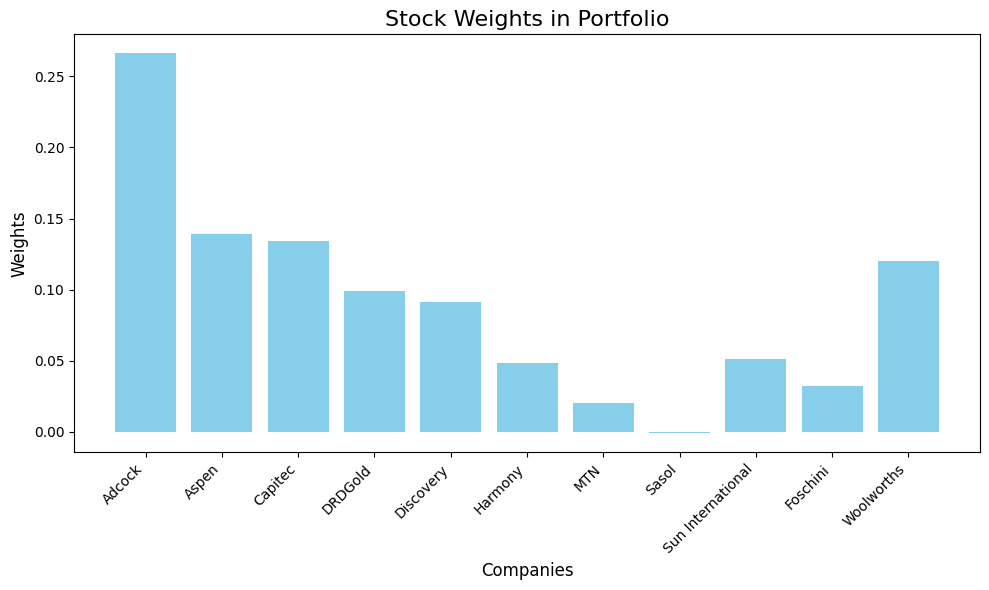

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Data
companies = ['Adcock', 'Aspen', 'Capitec', 'DRDGold', 'Discovery', 'Harmony',
             'MTN', 'Sasol', 'Sun International', 'Foschini', 'Woolworths']
weights = [0.2662, 0.1392, 0.1344, 0.0989, 0.0910, 0.0481,
           0.0202, -0.0011, 0.0509, 0.0321, 0.1200]


# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(companies, weights, color='skyblue')

# Adding title and labels
plt.title('Stock Weights in Portfolio', fontsize=16)
plt.xlabel('Companies', fontsize=12)
plt.ylabel('Weights', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


In [46]:
# Average the performace of the five portfolios
average_portfolio_weights = np.mean(comb_portfolio_weights, axis=0)
average_portfolio_varriance = np.mean(comb_portfolio_varriance, axis=0)
average_portfolio_returns = np.mean(comb_portfolio_returns, axis=0)

print(f"Averaged portfolio weights from five iterations: {np.round(average_portfolio_weights,4)}")
print(f"Averaged portfolio varriance from five iterations: {np.round(average_portfolio_varriance,3)}")
print(f"Averaged portfolio returns (%) from five iterations: {np.round(average_portfolio_returns*100,3)}")

Averaged portfolio weights from five iterations: [ 0.2662  0.1392  0.1344  0.0989  0.091   0.0481  0.0202 -0.0011  0.0509
  0.0321  0.12  ]
Averaged portfolio varriance from five iterations: 0.031
Averaged portfolio returns (%) from five iterations: 23.599


In [47]:
np.round(average_portfolio_weights,4)

array([ 0.2662,  0.1392,  0.1344,  0.0989,  0.091 ,  0.0481,  0.0202,
       -0.0011,  0.0509,  0.0321,  0.12  ])